OMCL


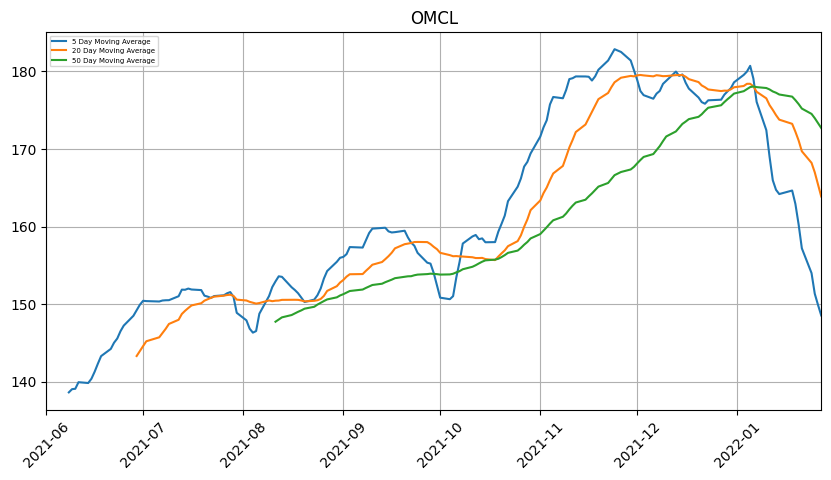

EXPO


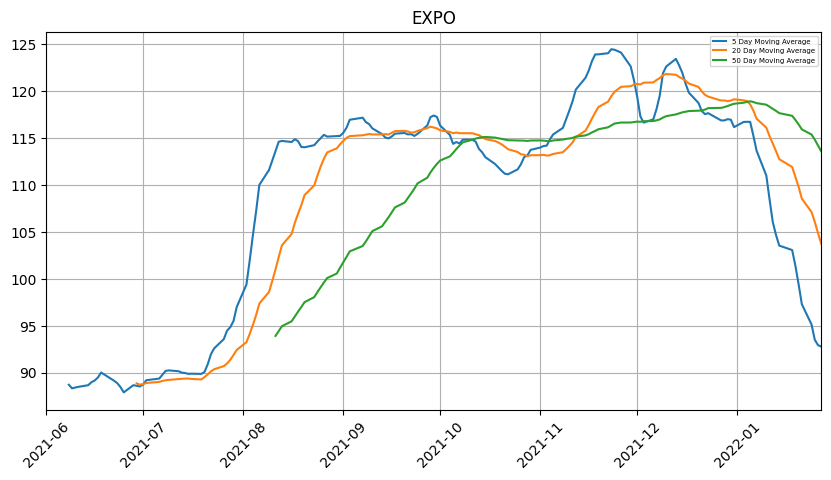

GTLS


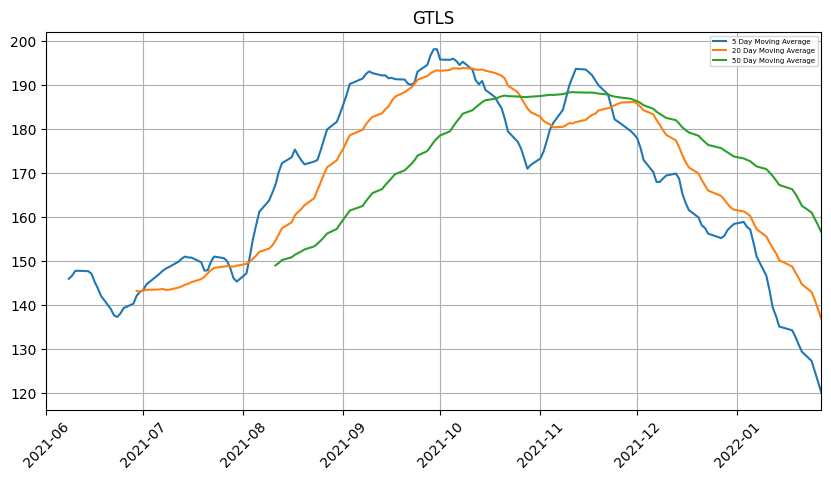

POWI


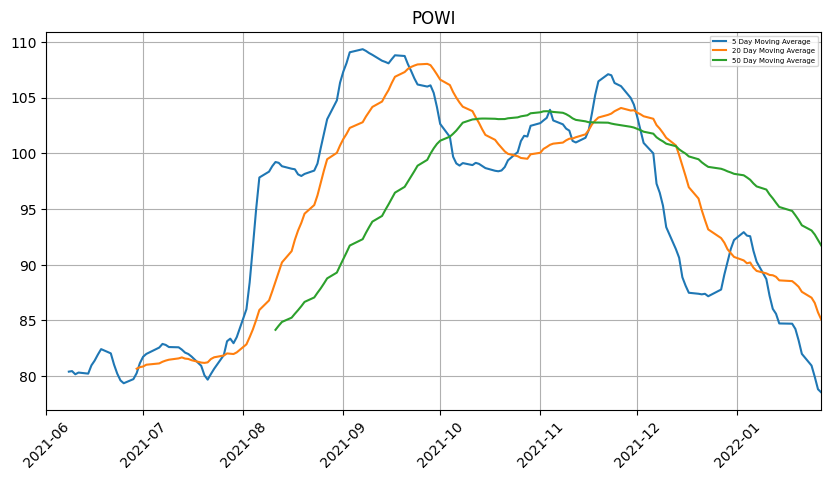

IIPR


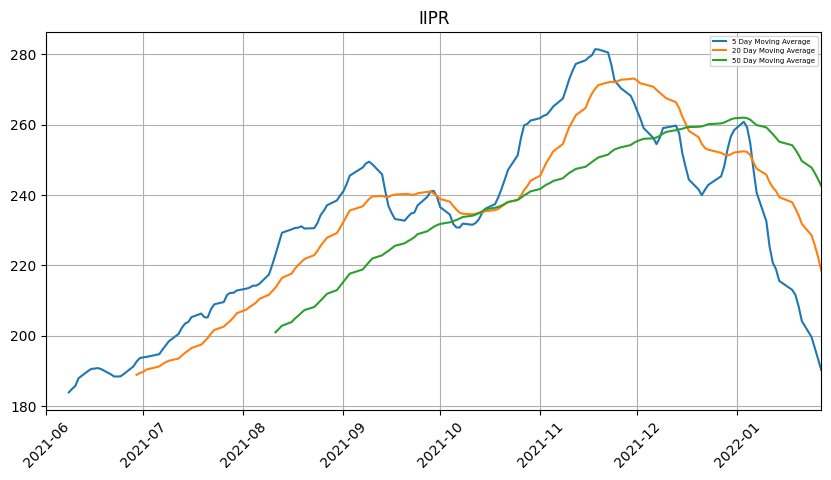

BCPC


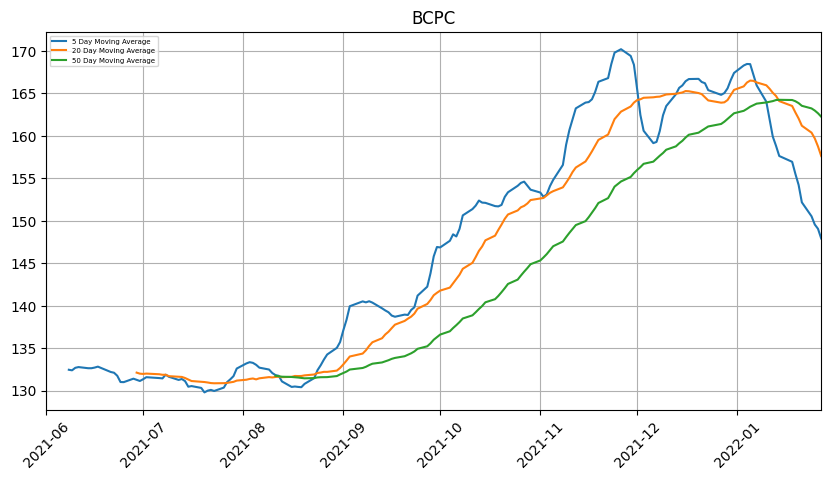

VG


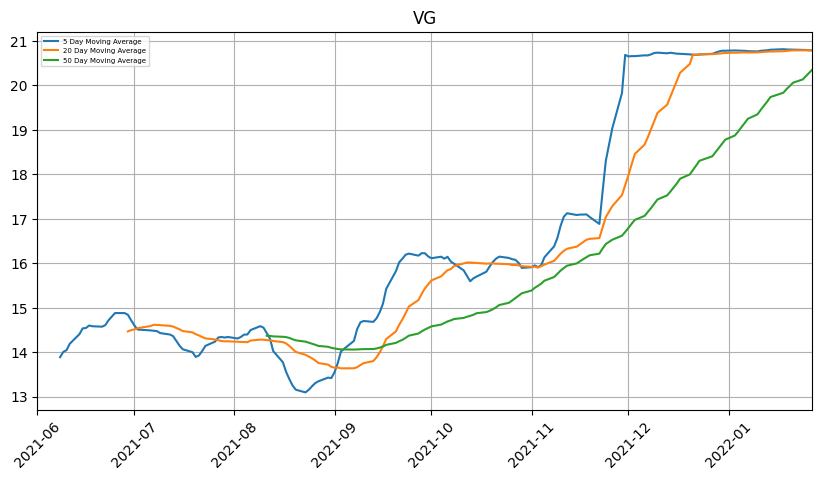

SPSC


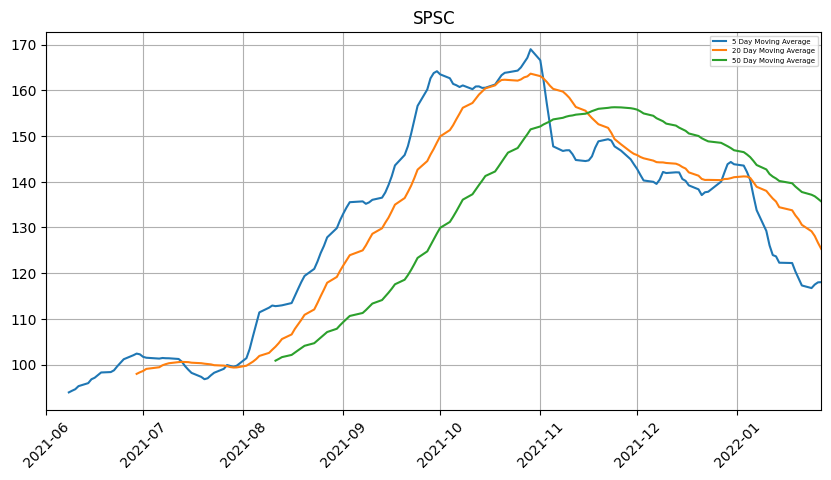

LTHM


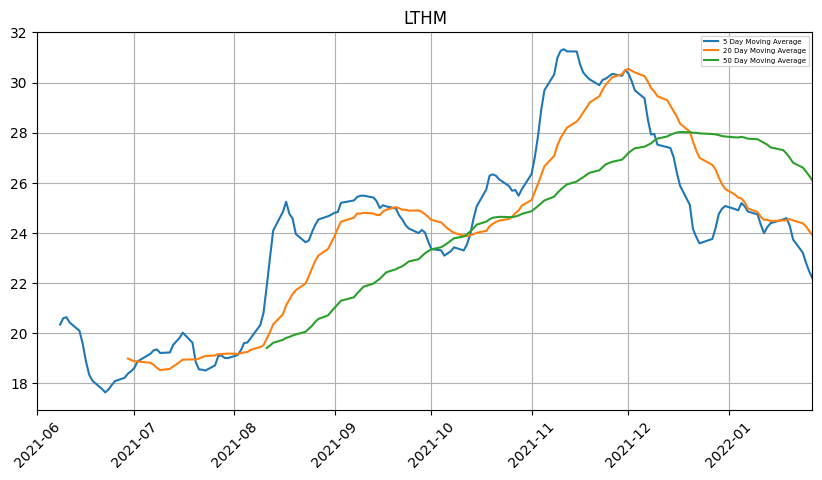

DIOD


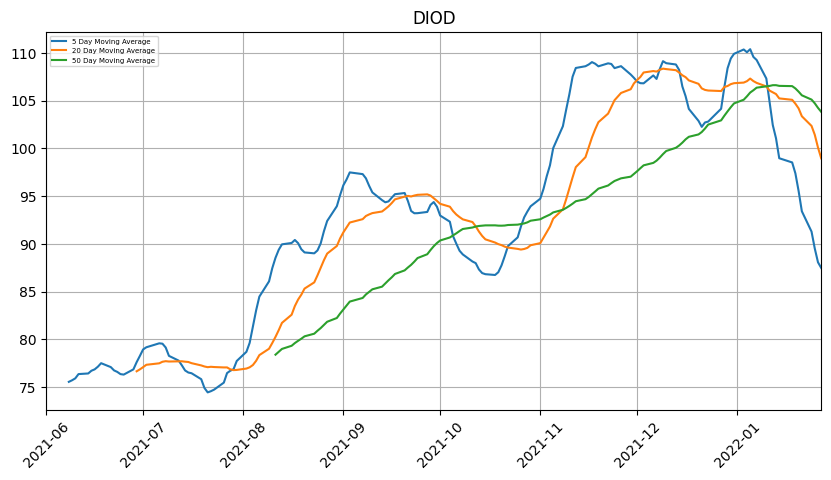

MXL


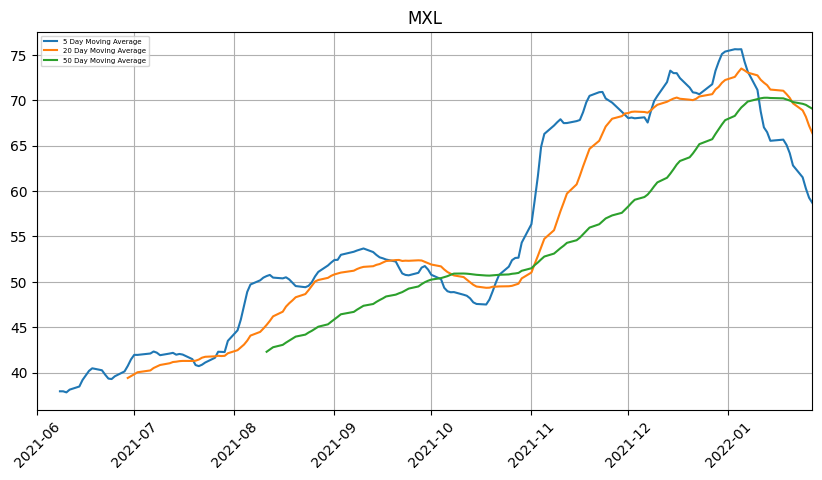

NEO


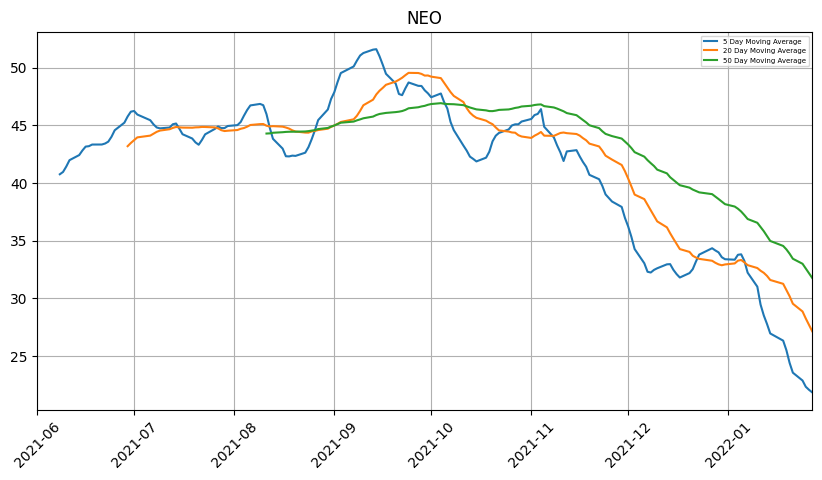

WD


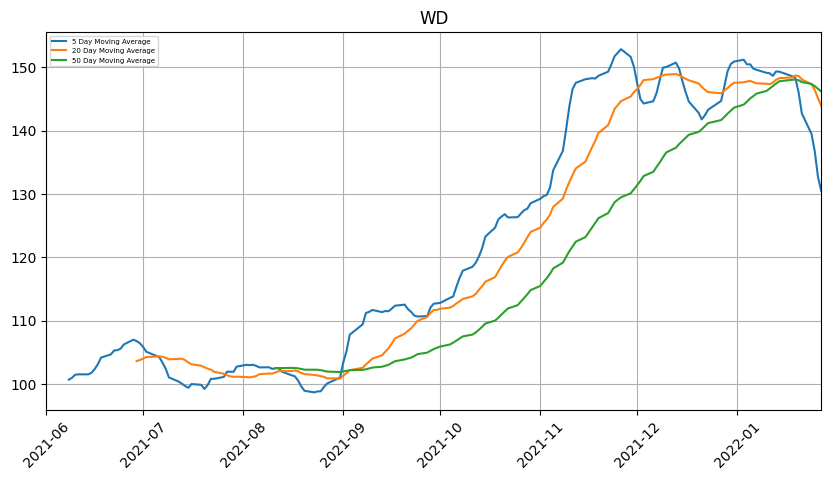

ONTO


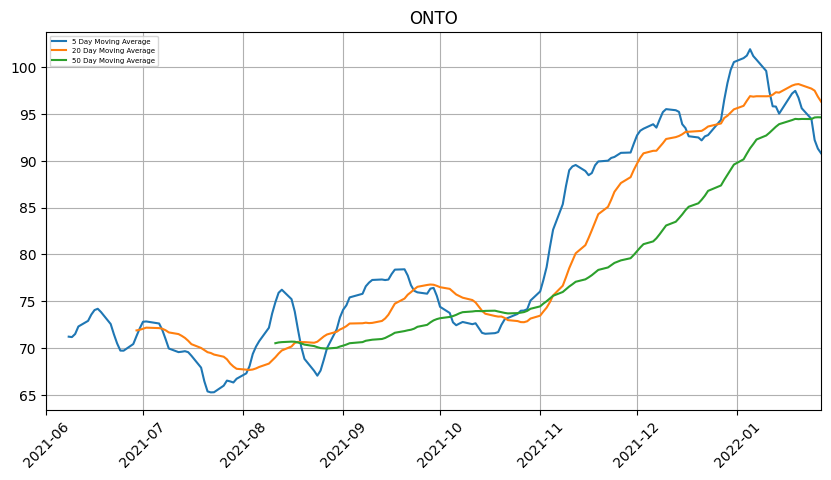

PRFT


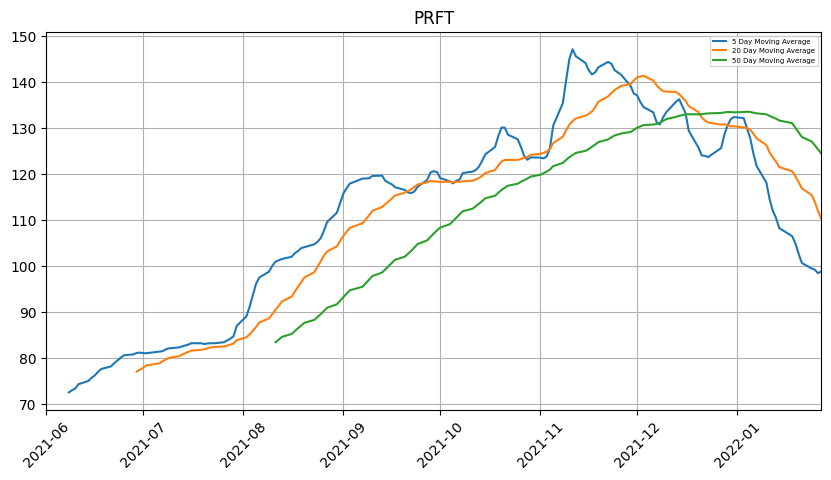

MTH


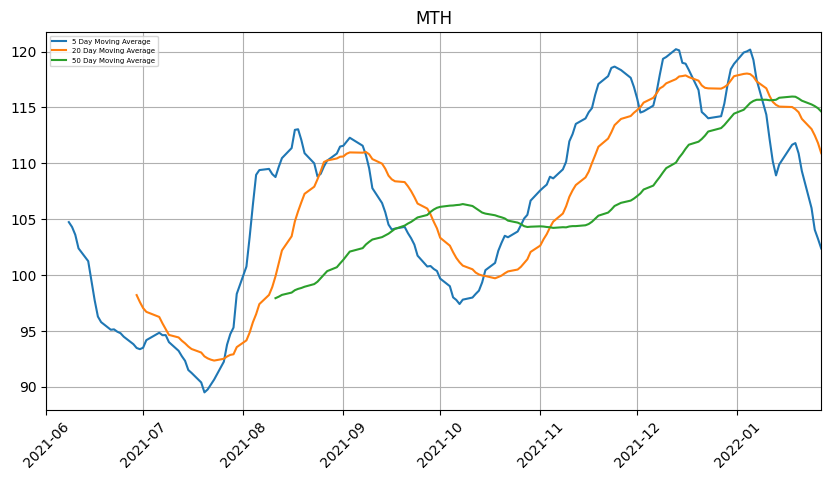

EXLS


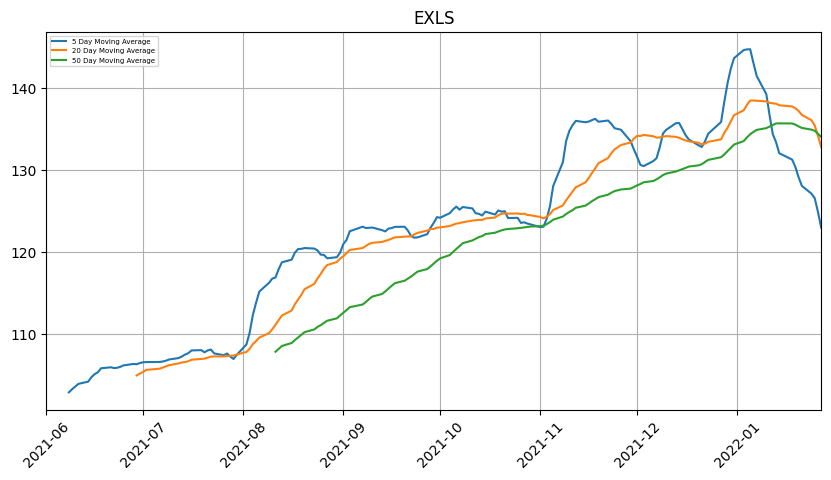

ENSG


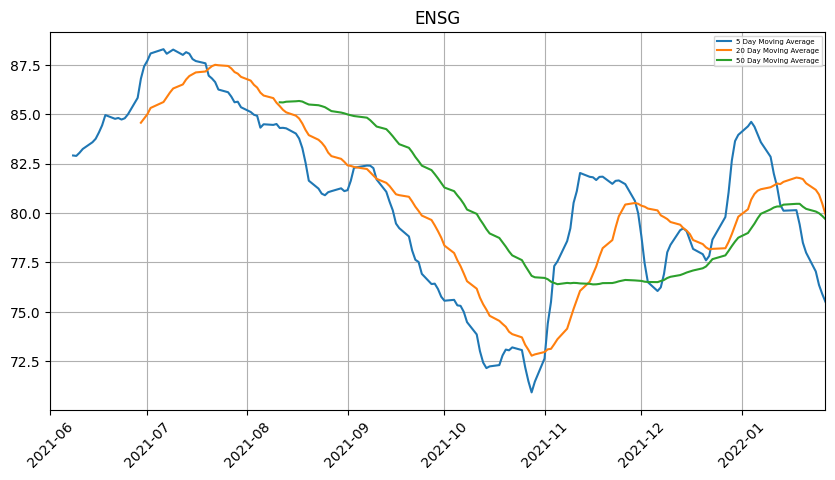

TRUP


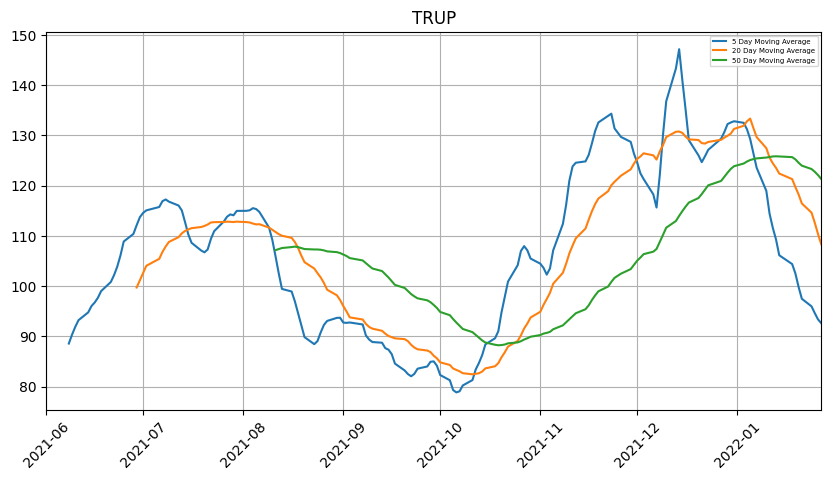

SFBS


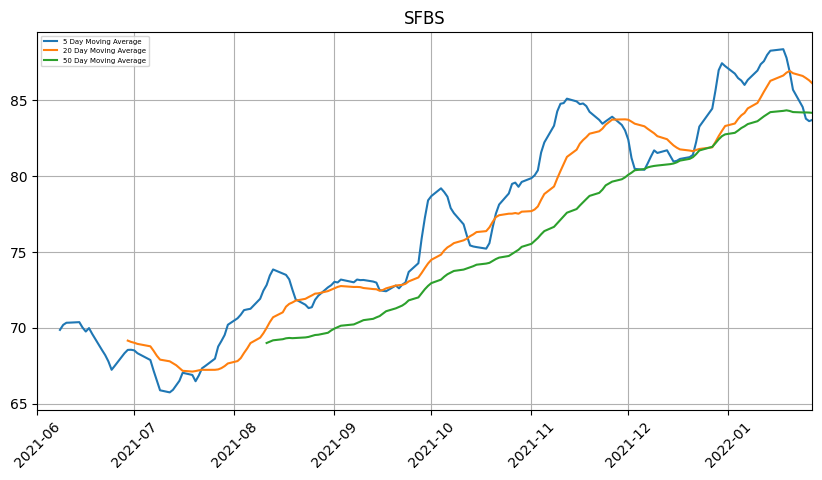

LCII


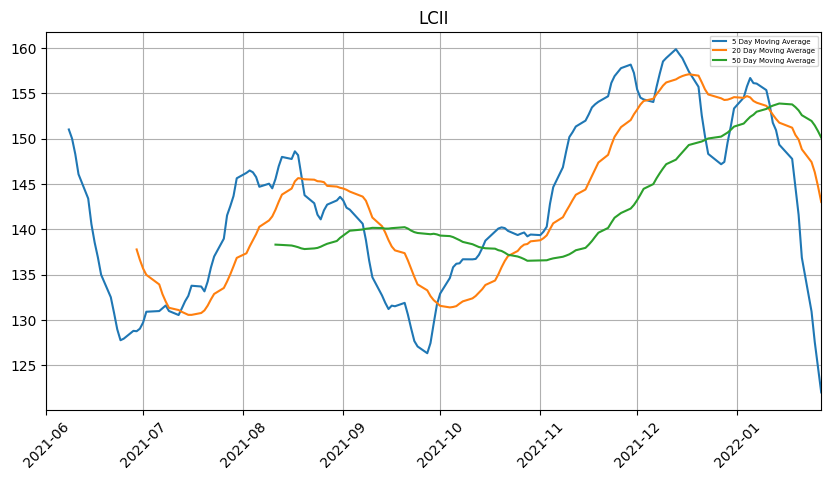

MATX


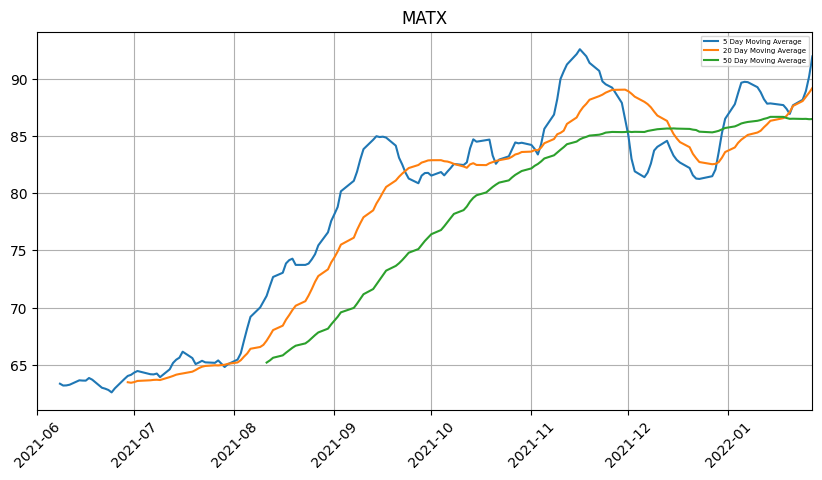

ALRM


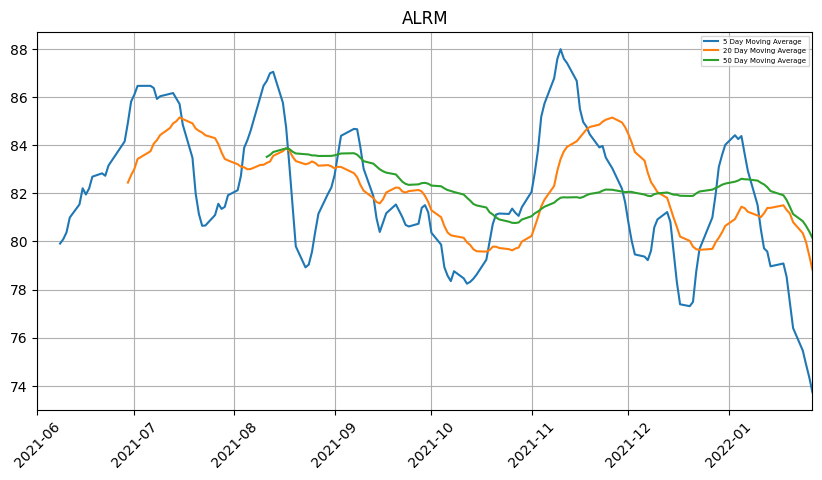

FELE


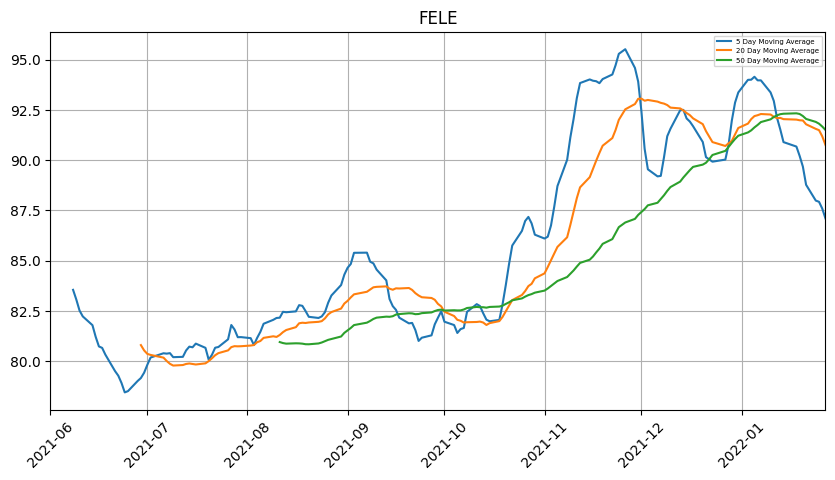

FIX


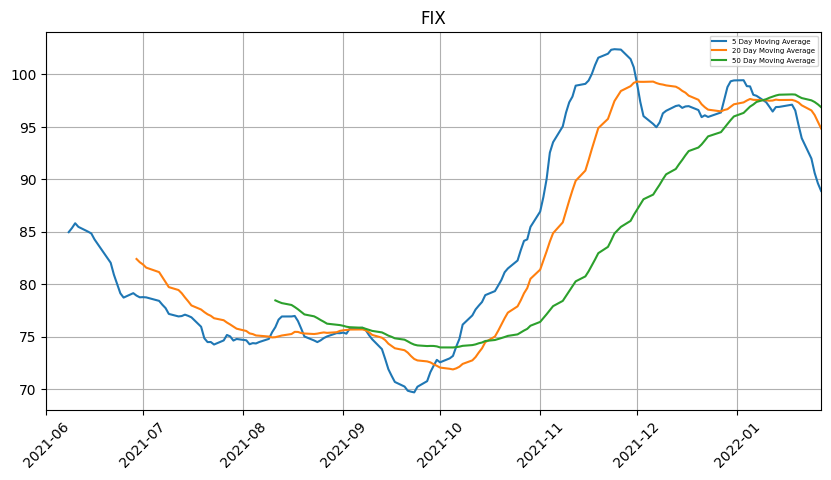

WTS


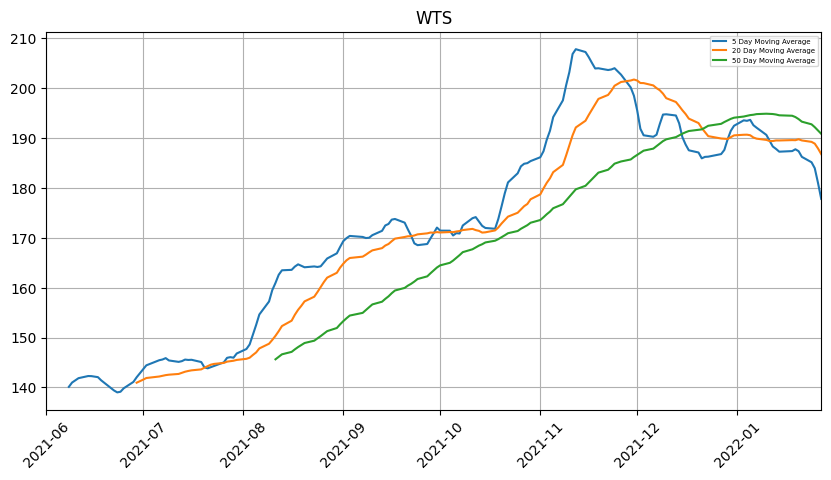

COOP


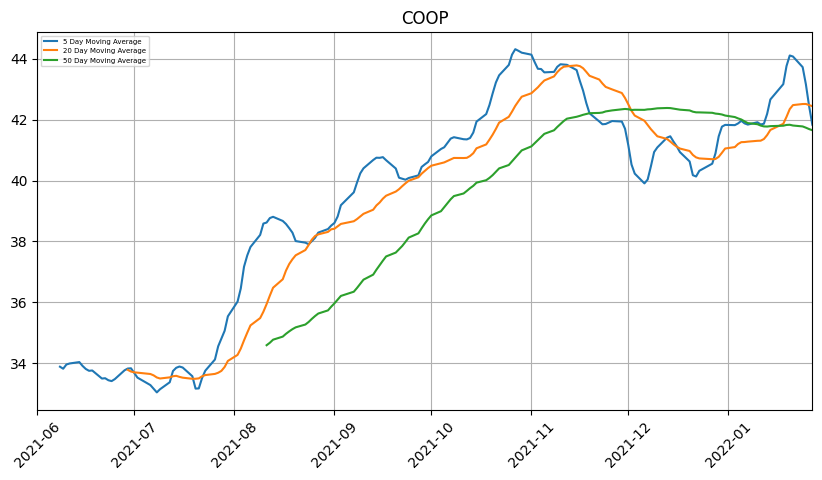

VIAV


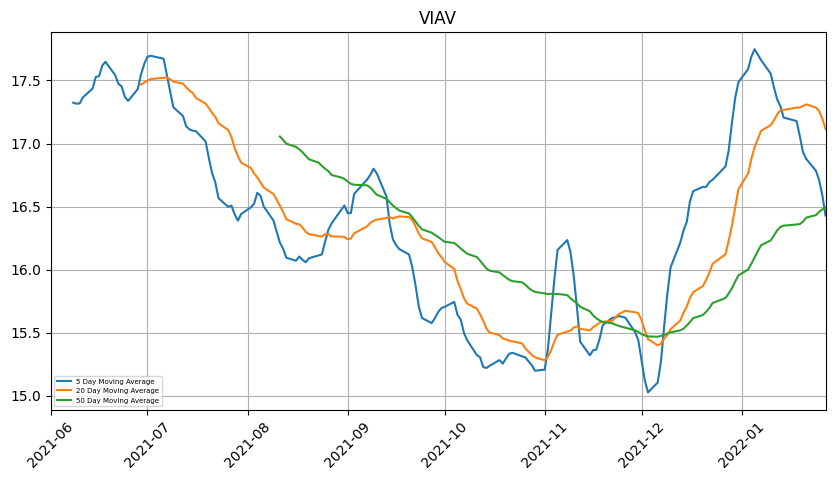

DORM


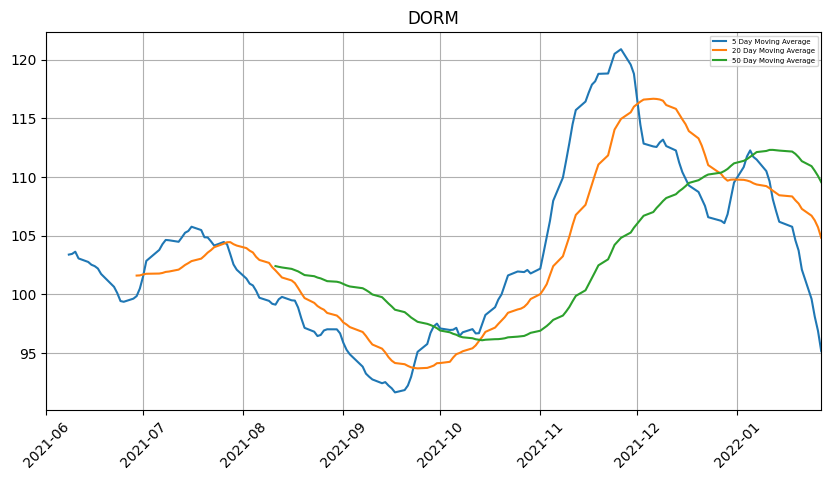

AEIS


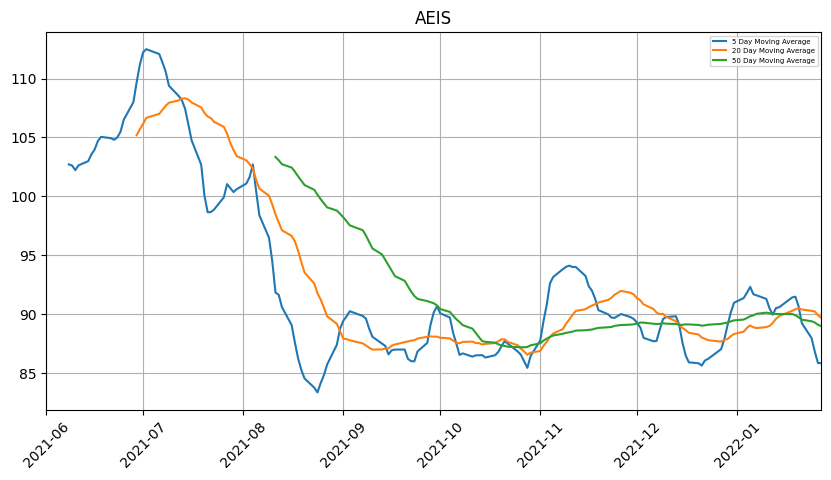

AMN


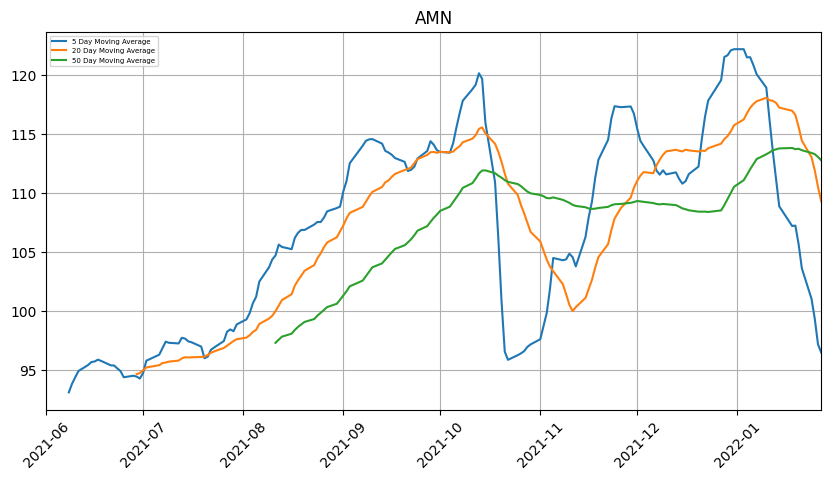

MMSI


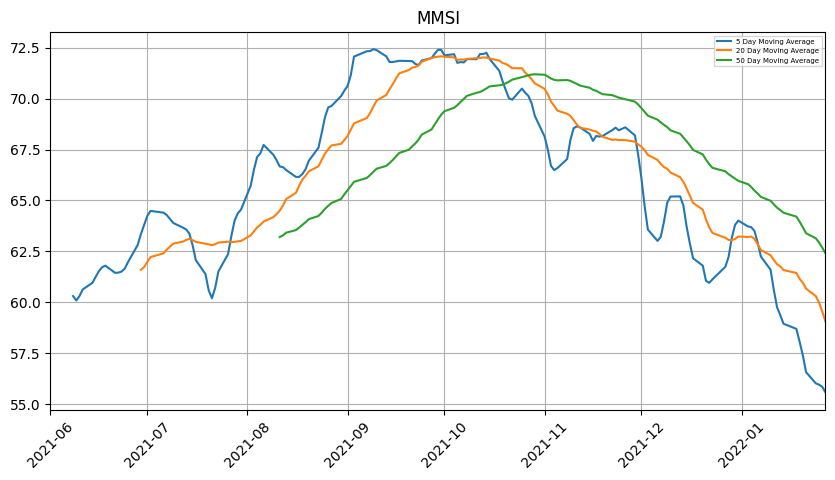

CYTK


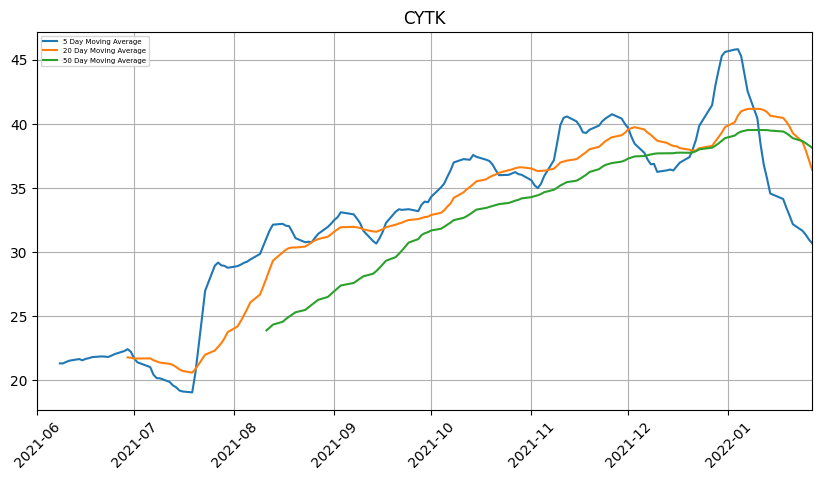

FORM


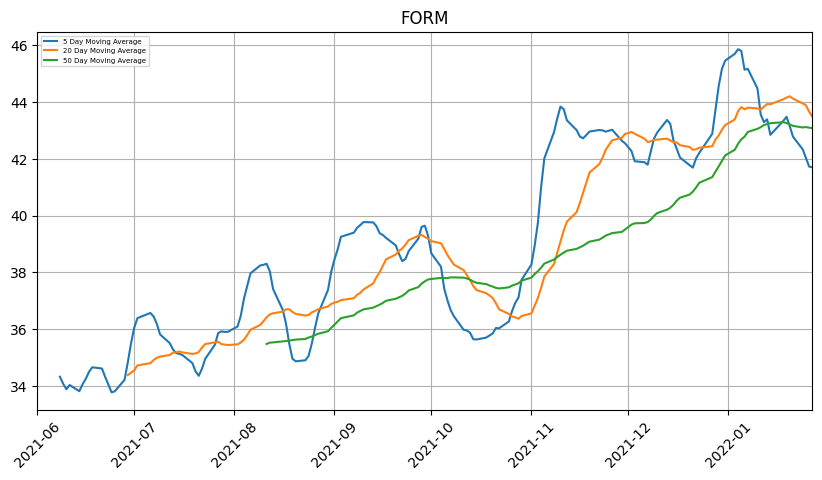

JBT


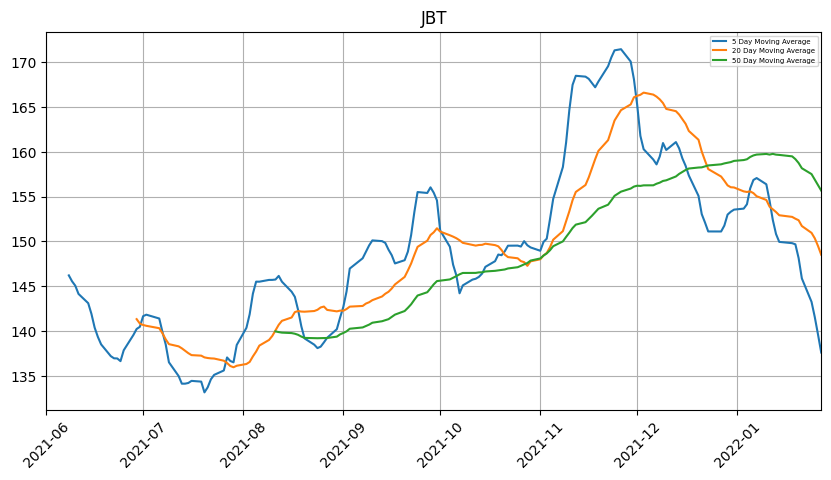

EPRT


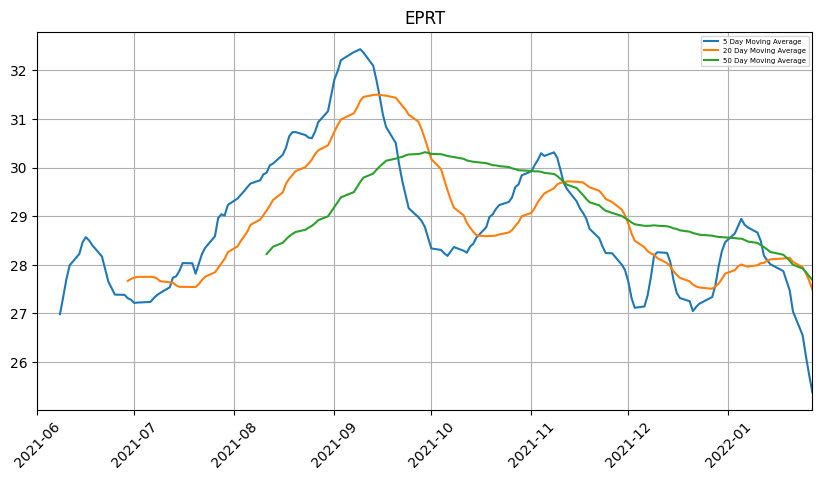

KWR


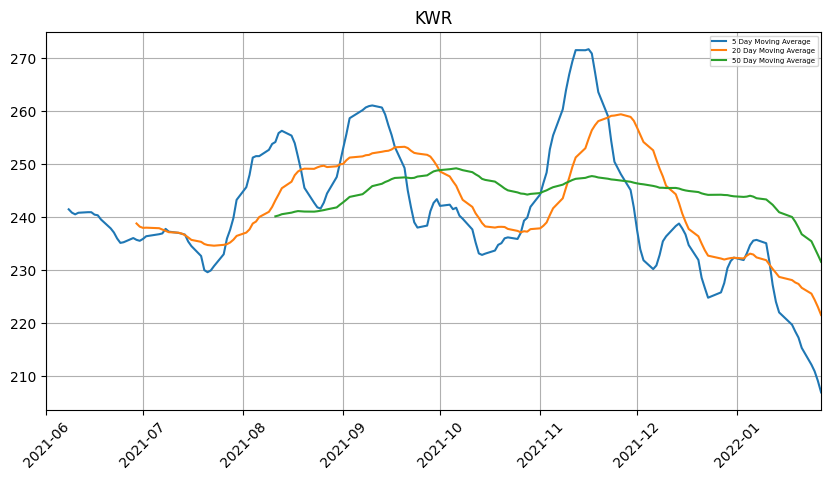

AX


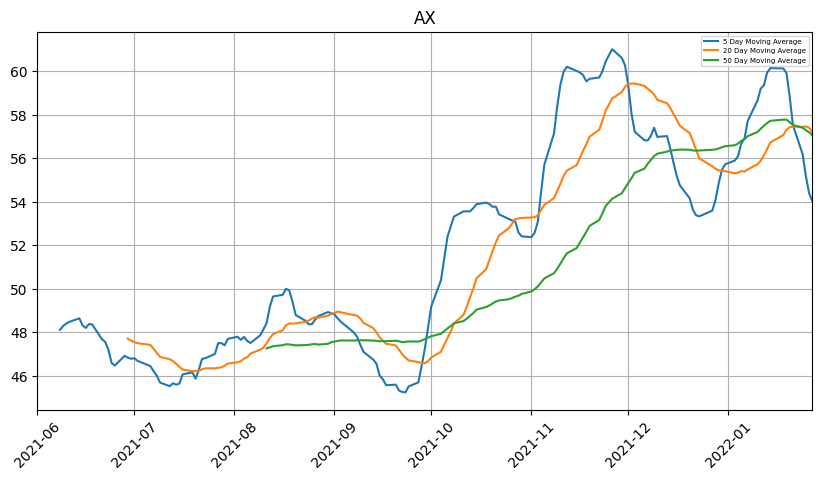

IBP


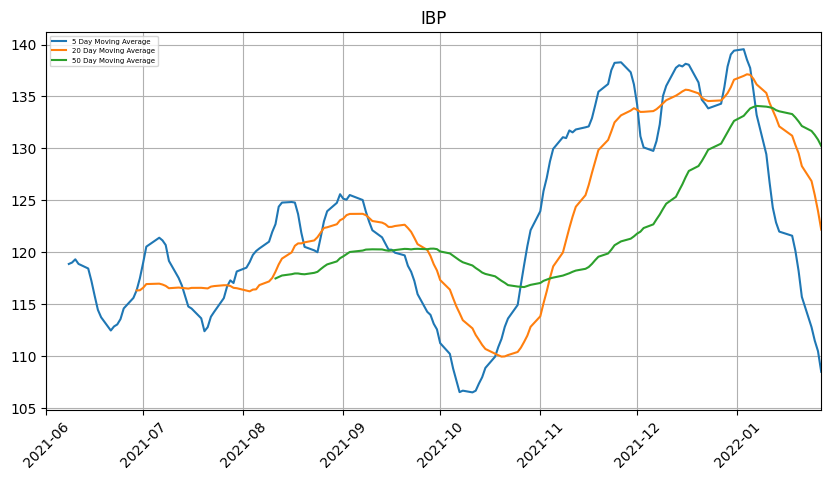

VICR


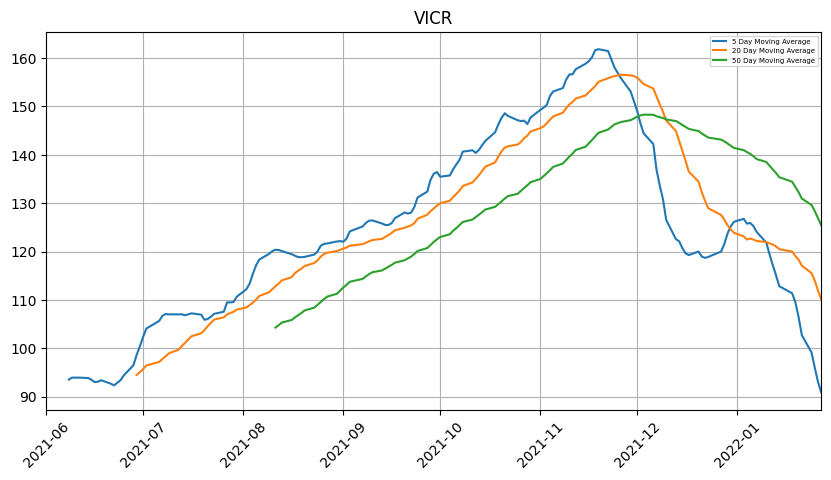

AAON


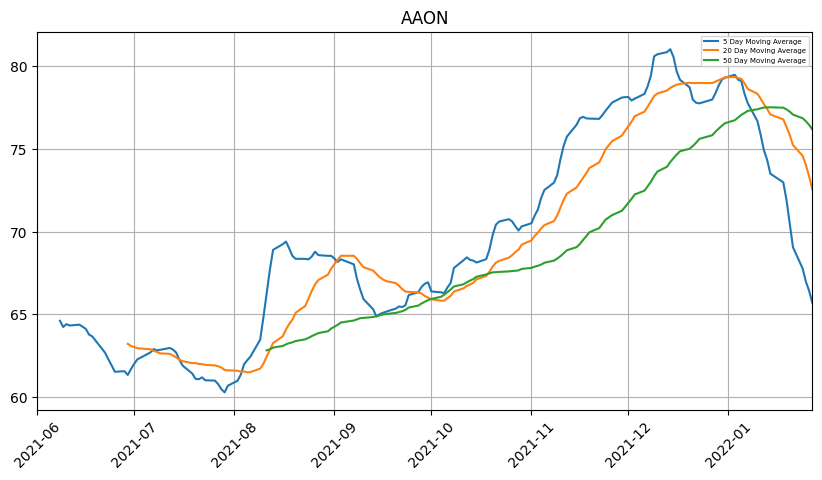

LGIH


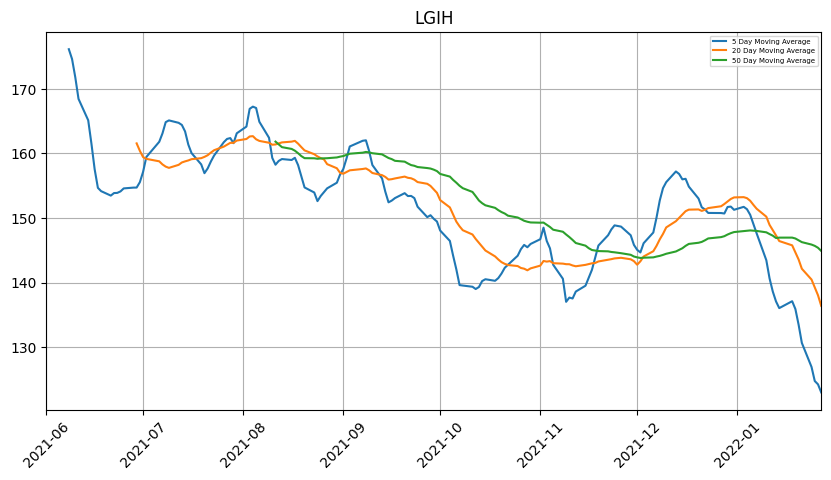

WDFC


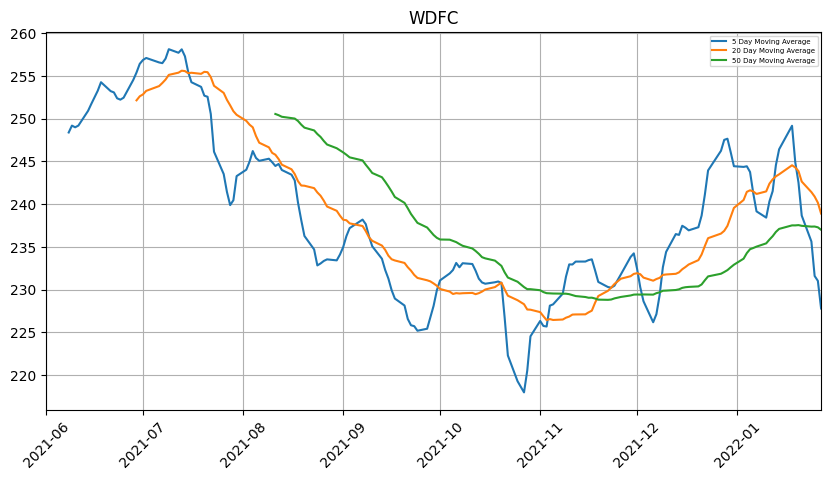

BMI


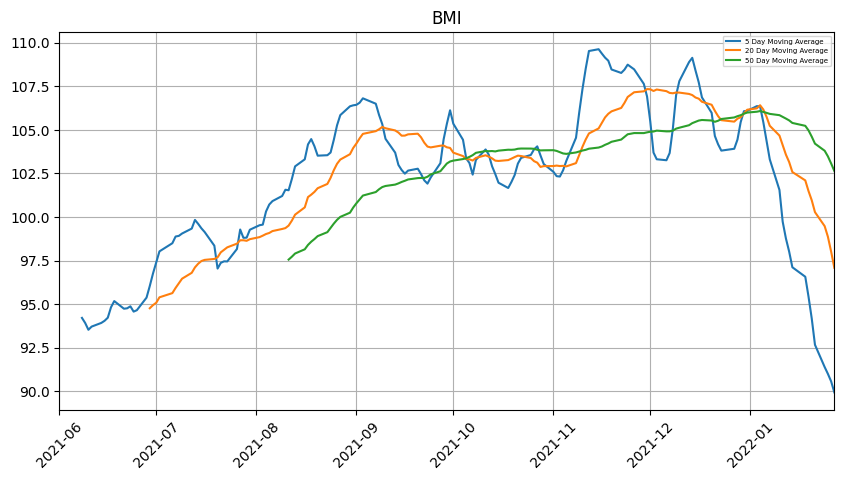

RRC


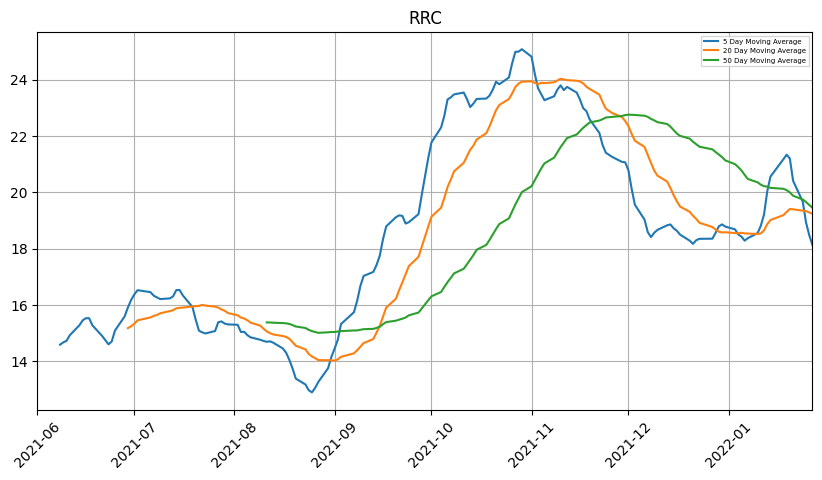

TBK


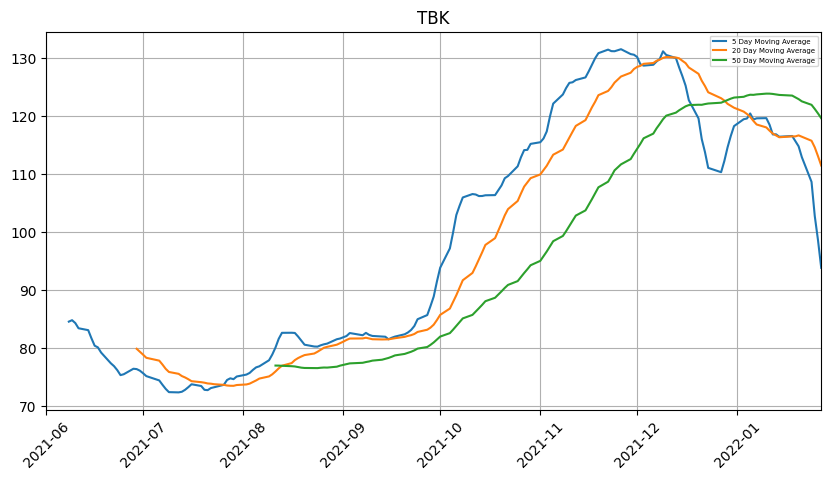

SHAK


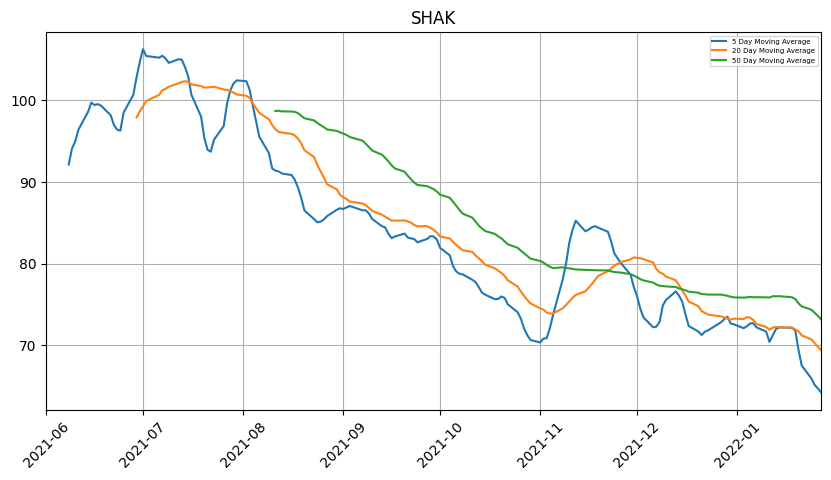

UFPI


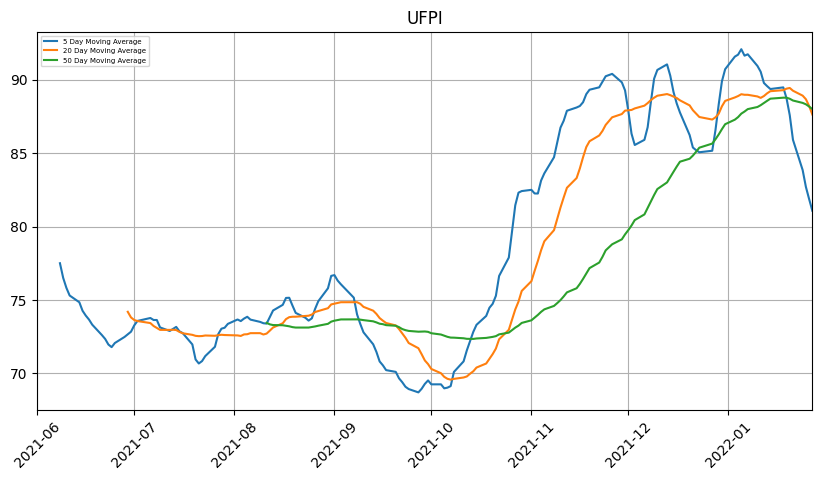

FWRD


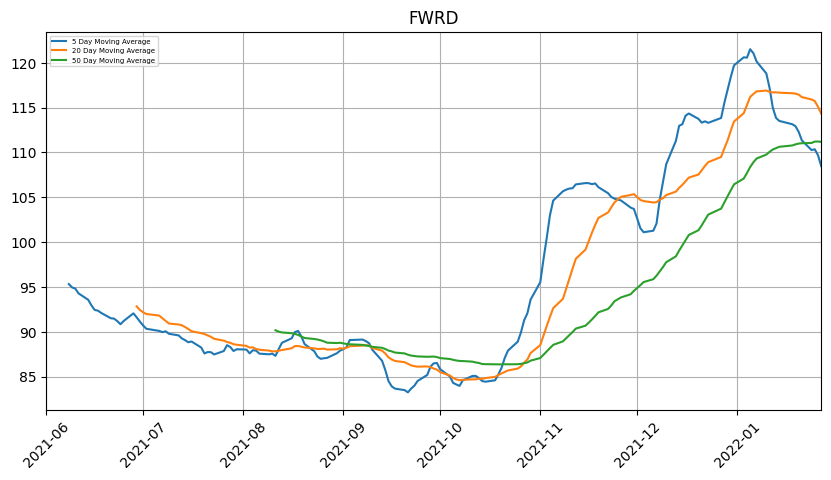

FSS


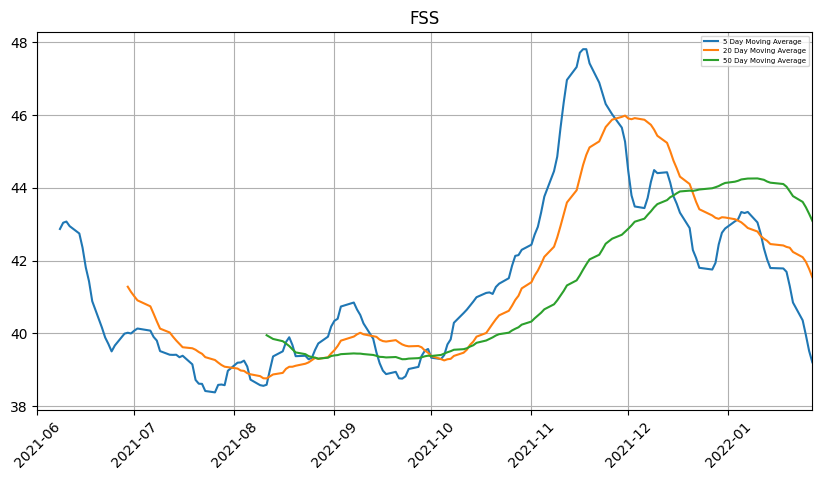

In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import os
import time

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

os.chdir(r"/home/hk-user/Documents/Document_Backup/Python_Code/Stock")

df_ijt = pd.read_csv(r"IJT_holdings.csv", skiprows = 9, nrows = 343)

df_ijt[df_ijt["Sector"] == 'Health Care']
df_ijt["Sector"].unique()
df_ijt["Sector"].value_counts()

#fig, ax = plt.subplots(figsize = (10,5), dpi = 100)

'''ax.pie(df_ijt["Sector"].value_counts(), 
       labels = df_ijt["Sector"].unique(),
       autopct = '%1.2f%%')'''

#for i in range(len(df_ijt)):
for i in range(50):
    
    print(df_ijt["Ticker"][i])
    
    df = yf.download(df_ijt["Ticker"][i],
                     start = '2021-06-01',
                     end = '2022-01-28',
                     progress = False)
    
    df.reset_index(inplace = True)
    
    nrows = df.shape[0]
    
    null_column = np.zeros(nrows)
    null_column[:] = np.NaN
    df['5 MA'] = null_column
    df['20 MA'] = null_column
    df['50 MA'] = null_column
    df['100 MA'] = null_column
    df['Daily Change (ln)'] = null_column
    
    for j in range(5, nrows):
        df['5 MA'][j] = np.mean(df.iloc[j-5:j:, 4])
        
    for j in range(20, nrows):
        df['20 MA'][j] = np.mean(df.iloc[j-20:j:, 4])
        
    for j in range(50, nrows):
        df['50 MA'][j] = np.mean(df.iloc[j-50:j:, 4])
        
    for j in range(100, nrows):
        df['100 MA'][j] = np.mean(df.iloc[j-100:j:, 4])
        
    for j in range(1, nrows):
        df['Daily Change (ln)'][j] = np.log(df.iloc[j,4]/df.iloc[(j-1),4])
    
    fig, ax = plt.subplots(figsize = (10,5), dpi = 100)
    
    plt.title(df_ijt["Ticker"][i])
    
    #ax.plot(df['Date'], df['Close'], label = df_ijt["Ticker"][i])
    #ax.plot(df['100 MA'], label = "100 Day Moving Average")
    #ax.plot(df['50 MA'], label = "50 Day Moving Average")
    #ax.plot(df['Date'], df['Daily Change (ln)'], label = "Daily Change")
    ax.plot(df['Date'], df['5 MA'], label = "5 Day Moving Average")
    ax.plot(df['Date'], df['20 MA'], label = "20 Day Moving Average")
    ax.plot(df['Date'], df['50 MA'], label = "50 Day Moving Average")
    #ax.plot(df['Date'], df['100 MA'], label = "100 Day Moving Average")

    ax.grid(True)
    ax.legend(fontsize = 5)
    plt.xticks(rotation = 45)

    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    days = mdates.DayLocator()  # every day
    years_fmt = mdates.DateFormatter('%Y')
    months_fmt = mdates.DateFormatter('%M')

    ax.xaxis.set_major_locator(months)
    #ax.xaxis.set_major_formatter(months_fmt)
    #ax.xaxis.set_minor_locator(months)

    datemin = np.datetime64(df['Date'][0], 'D')
    datemax = np.datetime64(df['Date'][nrows - 1], 'D')# + np.timedelta64(1, 'Y')
    ax.set_xlim(datemin, datemax)

    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    
    plt.show()
    time.sleep(10)

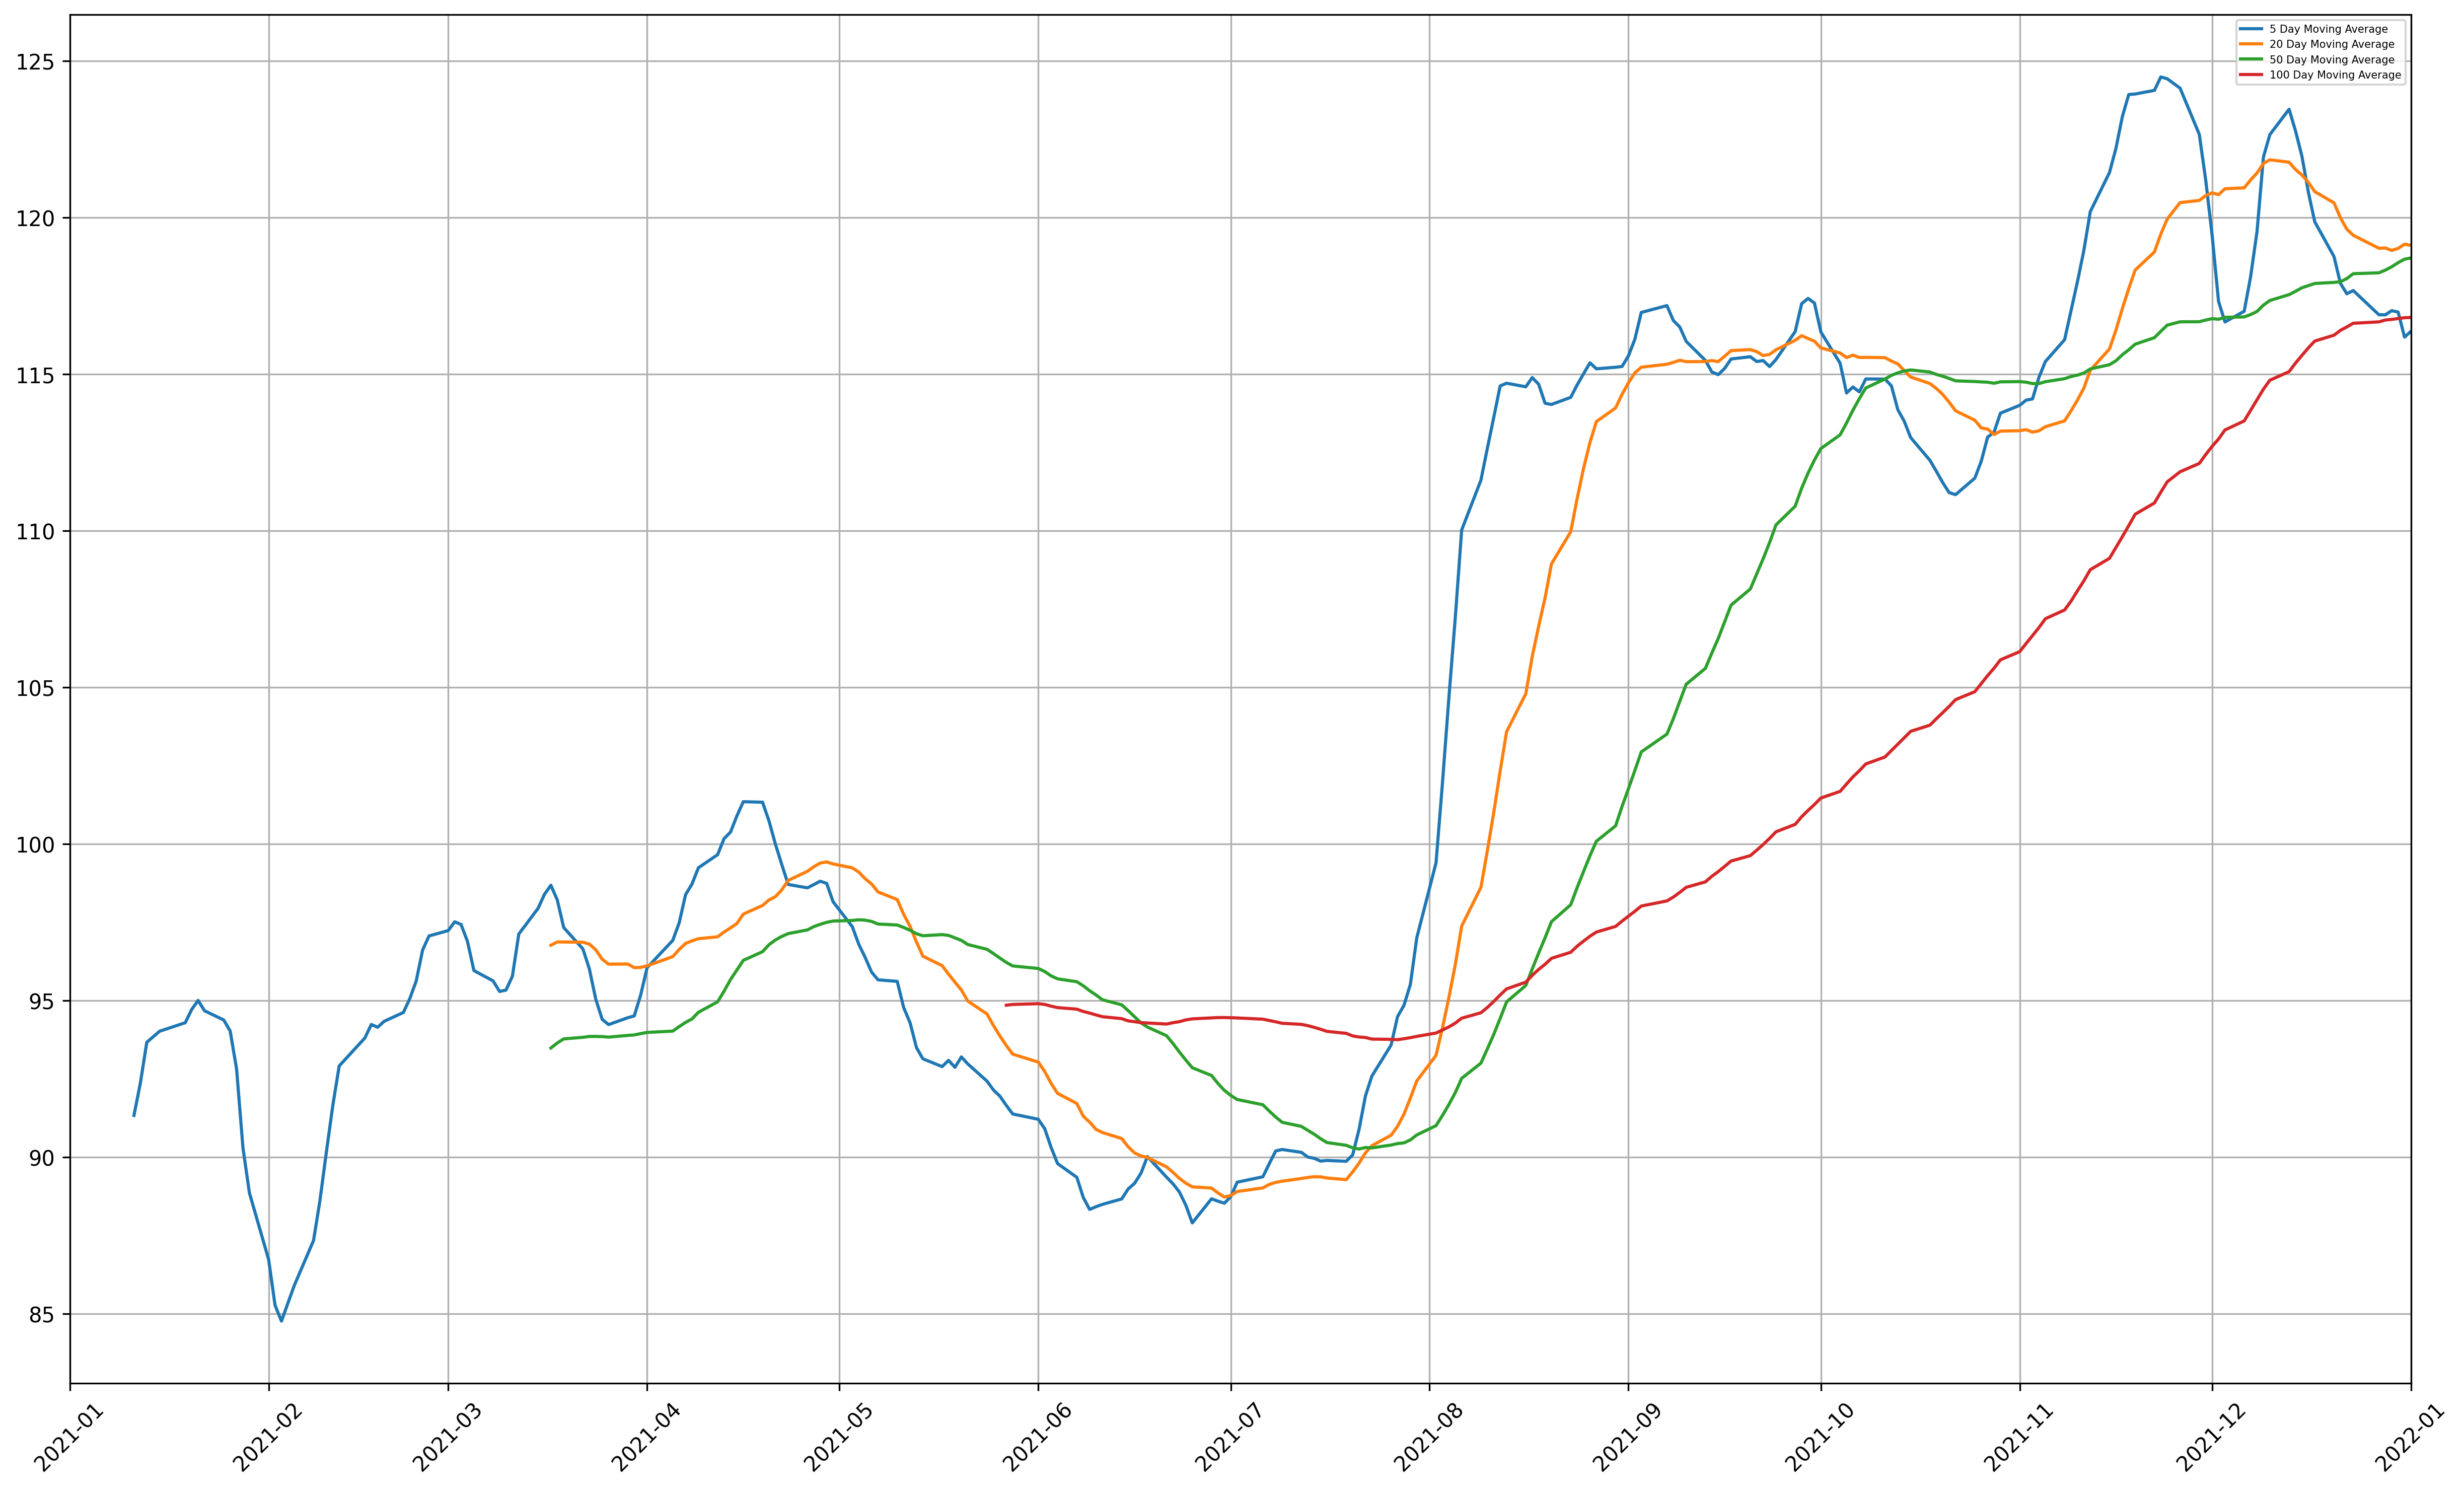

In [16]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
 
df = yf.download('EXPO',
start='2021-01-01',
end='2022-01-28',
progress = False)

df.reset_index(inplace=True)

nrows = df.shape[0]

null_column = np.zeros(nrows)
null_column[:] = np.NaN
df['5 MA'] = null_column
df['20 MA'] = null_column
df['50 MA'] = null_column
df['100 MA'] = null_column
df['Daily Change (ln)'] = null_column

for i in range(5, nrows):
    df['5 MA'][i] = np.mean(df.iloc[i-5:i:, 4])
    
for i in range(50, nrows):
    df['20 MA'][i] = np.mean(df.iloc[i-20:i:, 4])
    
for i in range(50, nrows):
    df['50 MA'][i] = np.mean(df.iloc[i-50:i:, 4])
    
for i in range(100, nrows):
    df['100 MA'][i] = np.mean(df.iloc[i-100:i:, 4])
    
for i in range(1, nrows):
    df['Daily Change (ln)'][i] = np.log(df.iloc[i,4]/df.iloc[(i-1),4])

fig, ax = plt.subplots(figsize = (20,12), dpi = 300)

#ax.plot(df['100 MA'], label = "100 Day Moving Average")
#ax.plot(df['50 MA'], label = "50 Day Moving Average")
#ax.plot(df['Date'], df['Daily Change (ln)'], label = "Daily Change")
ax.plot(df['Date'], df['5 MA'], label = "5 Day Moving Average")
ax.plot(df['Date'], df['20 MA'], label = "20 Day Moving Average")
ax.plot(df['Date'], df['50 MA'], label = "50 Day Moving Average")
ax.plot(df['Date'], df['100 MA'], label = "100 Day Moving Average")
ax.grid(True)
ax.legend(fontsize = 5)
plt.xticks(rotation = 45)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%M')

ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(months_fmt)
#ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(df['Date'][0], 'M')
datemax = np.datetime64(df['Date'][nrows - 1], 'M')# + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')